In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
import random

In [4]:
x_data = [0, 0.2, 0.4, 0.8, 1, 1.5, 1.8, 2, 2.5, 2.8, 3, -1, -0.2, -0.5, -0.9, -1.5]

y_data = [1.431, 2.876, 0.564, -0.451, 0.504, -2.537, -2.607, -5.373, -5.222, -6.66, -8.585, -
6.251, 0.24, -2.013, -6.621, -17.692]

min(x_data) ,  max(x_data) ,min(y_data),max(y_data) , len(x_data)

(-1.5, 3, -17.692, 2.876, 16)

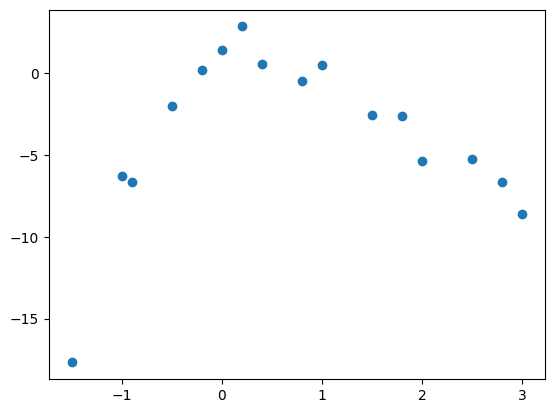

In [5]:
plt.scatter(x_data , y_data)

plt.show()

In [10]:
class GA:
    def __init__(self, x_data, y_data, num_genes, mutation_rate, tournament_size):
        self.x_data = x_data
        self.y_data = y_data
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size

    def fitness(self, chromosome):
        # Convert chromosome to polynomial coefficients
        polynomial = np.poly1d(chromosome)

        y_predicted = polynomial(self.x_data)

        # Calculate mean squared error
        mse = MSE(y_predicted , self.y_data)

        return -mse  # Negative because we want to maximize fitness

    def select_parents(self, population):
        # Tournament selection
        selected_parents = random.sample(population, self.tournament_size)

        # Sort the selected parents based on fitness score in descending order
        sorted_parents = sorted(selected_parents, key=self.fitness, reverse=True)

        # Return the two best parents based on fitness score
        return sorted_parents[0], sorted_parents[1]



    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def mutate(self, chromosome):
        # Random mutation
        for i in range(self.num_genes):
            if random.random() < self.mutation_rate:
                chromosome[i] += np.random.normal(-0.5, 0.5)  # Adding small random noise
        return chromosome

    def ga(self, num_generations, population_size):
        # Initialize population
        population = [np.random.uniform(-5, 5, self.num_genes) for _ in range(population_size)]

        for generation in range(num_generations):
            new_population = []
            

            #Preserving the best individual
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

            for _ in range(population_size // 2 - 1):
                parent1, parent2 = self.select_parents(population)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                mutated_child1 = self.mutate(child1)
                mutated_child2 = self.mutate(child2)
                new_population.extend([mutated_child1, mutated_child2])
            
            
            gen_fit_list = list(map(self.fitness , new_population))
            gen_average = sum(gen_fit_list)/len(new_population)
            if generation%10 ==0:
                print(f"Generation{generation} ------------> average fitness is {gen_average} , best fitness: {max(gen_fit_list)}")

            population = new_population

        best_individual = max(population, key=self.fitness)
        return best_individual



In [11]:
# Example usage
x_data = [0, 0.2, 0.4, 0.8, 1, 1.5, 1.8, 2, 2.5, 2.8, 3, -1, -0.2, -0.5, -0.9, -1.5]

y_data = [1.431, 2.876, 0.564, -0.451, 0.504, -2.537, -2.607, -5.373, -5.222, -6.66, -8.585,-6.251, 0.24, -2.013, -6.621, -17.692]


#جمعیت اولیه نرمال
ga = GA(x_data, y_data, 4 , 0.1, 5)
best_chromosome1 = ga.ga(num_generations=300, population_size=100)
print("Best chromosome:", best_chromosome1)

Generation0 ------------> average fitness is -343.78569303511404 , best fitness: -23.71310011006891
Generation10 ------------> average fitness is -12.0381833032437 , best fitness: -2.2975953411824594
Generation20 ------------> average fitness is -7.650846425788186 , best fitness: -1.399065289074144
Generation30 ------------> average fitness is -9.099655969923582 , best fitness: -1.2910550395835365
Generation40 ------------> average fitness is -7.405295341367891 , best fitness: -0.987458876679165
Generation50 ------------> average fitness is -5.8333312090388985 , best fitness: -0.9826744580932165
Generation60 ------------> average fitness is -8.049748249734774 , best fitness: -0.9784308420222296
Generation70 ------------> average fitness is -12.712647001968127 , best fitness: -0.9671961642561065
Generation80 ------------> average fitness is -6.596448792008411 , best fitness: -0.9472421039276059
Generation90 ------------> average fitness is -5.719041011446522 , best fitness: -0.942575680

In [12]:
x_axis = np.arange(-3,5,0.05)

def eval_non_int(best_chromosome , new_x):
    
    polynomial = np.poly1d(best_chromosome)
    
    final_y = polynomial(new_x).tolist()

    for z in final_y:
        if z<-35:
            final_y[final_y.index(z)] = -20
        if z>15:
            final_y[final_y.index(z)] = 10

    return final_y

In [13]:
x_axis = np.arange(-3,5,0.05)

def eval_int(best_chromosome , new_x):
    
    top_chromosome = [int(chromosome) for chromosome in best_chromosome]
    
    polynomial = np.poly1d(best_chromosome)
    
    final_y = polynomial(new_x).tolist()

    for z in final_y:
        if z<-35:
            final_y[final_y.index(z)] = -10
        if z>7:
            final_y[final_y.index(z)] = 10

    return final_y

In [14]:
def visualize(best_chromosome,x_axis,x_data ,y_data,eval):
    plt.plot(x_axis, eval(best_chromosome,x_axis))
    plt.scatter(x_data,y_data)
    plt.xlabel("x data")
    plt.ylabel("y data")
    plt.title("My GA visualize")
    plt.legend(['First line', 'Second line'])
    plt.show()

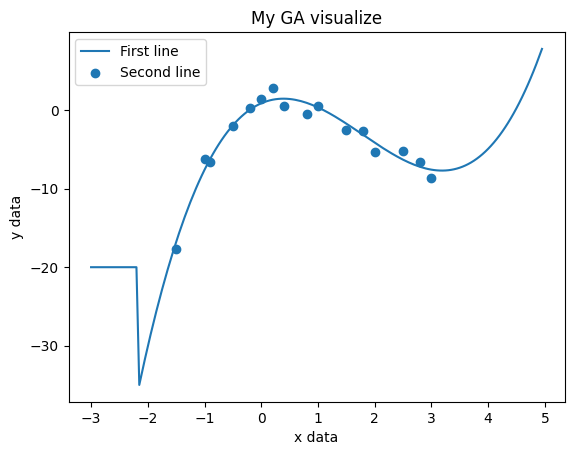

In [15]:
visualize(best_chromosome1,x_axis,x_data ,y_data,eval_non_int)

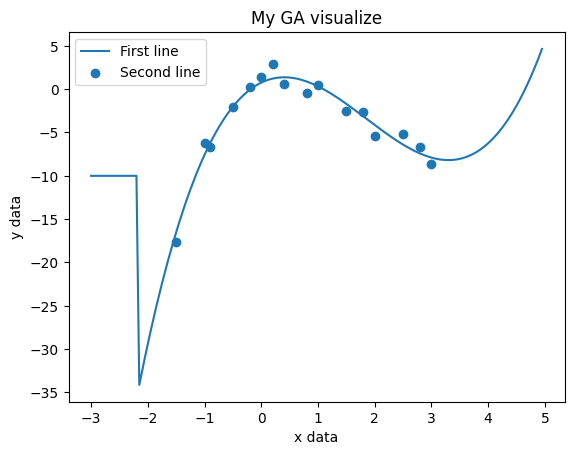

In [295]:
visualize(best_chromosome1,x_axis,x_data ,y_data,eval_int)

In [299]:
# Example usage
x_data = [0, 0.2, 0.4, 0.8, 1, 1.5, 1.8, 2, 2.5, 2.8, 3, -1, -0.2, -0.5, -0.9, -1.5]
y_data = [1.431, 2.876, 0.564, -0.451, 0.504, -2.537, -2.607, -5.373,
          -5.222, -6.66, -8.585, -6.251, 0.24, -2.013, -6.621, -17.692]

#جمعیت اولیه بسیار کم
ga = GA(x_data, y_data, 4, 0.1, 5)
best_chromosome2 = ga.ga(num_generations=300, population_size=10)
print("Best chromosome:", best_chromosome2)


Generation0: average fitness is -728.8075971159205 , best fitness: -74.81253907760328
Generation10: average fitness is -50.95285119312845 , best fitness: -39.84340147963081
Generation20: average fitness is -45.401813251916934 , best fitness: -38.58791882336225
Generation30: average fitness is -37.87542123763521 , best fitness: -37.34123628689868
Generation40: average fitness is -35.78844338833082 , best fitness: -35.78289779017743
Generation50: average fitness is -35.72828328352753 , best fitness: -33.85010609229833
Generation60: average fitness is -32.94865773193151 , best fitness: -32.54980187719181
Generation70: average fitness is -37.9714376846943 , best fitness: -31.9133575393652
Generation80: average fitness is -43.33102243955799 , best fitness: -30.963858331074572
Generation90: average fitness is -38.804099469451906 , best fitness: -30.423504689990743
Generation100: average fitness is -42.72628605601226 , best fitness: -30.291461413610097
Generation110: average fitness is -35.45

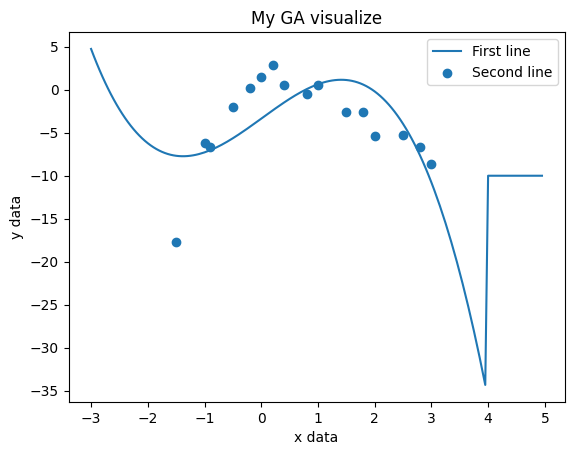

In [301]:
visualize(best_chromosome2,x_axis,x_data ,y_data,eval_int)

In [302]:
#جمعیت اولیه بسیار بزرگ
ga = GA(x_data, y_data, 4, 0.1, 5)
best_chromosome3 = ga.ga(num_generations=100, population_size=20000)
print("Best chromosome:", best_chromosome3)


Generation0: average fitness is -348.2781315780016 , best fitness: -1.7952743321548557
Generation10: average fitness is -13.419225954720108 , best fitness: -0.7885507486690171
Generation20: average fitness is -7.65820071182923 , best fitness: -0.7843003159562086
Generation30: average fitness is -7.183464231071171 , best fitness: -0.7821093896910126
Generation40: average fitness is -6.802346683168734 , best fitness: -0.781703624045921
Generation50: average fitness is -6.882166678965147 , best fitness: -0.7816677686905931
Generation60: average fitness is -6.770008527888582 , best fitness: -0.7816620393129854
Generation70: average fitness is -6.9423584440850705 , best fitness: -0.7816620393129854
Generation80: average fitness is -7.084034252404054 , best fitness: -0.7816620393129854
Generation90: average fitness is -6.884809495688118 , best fitness: -0.7816620393129854
Best chromosome: [ 0.93947755 -4.74094834  2.93369561  1.06866068]


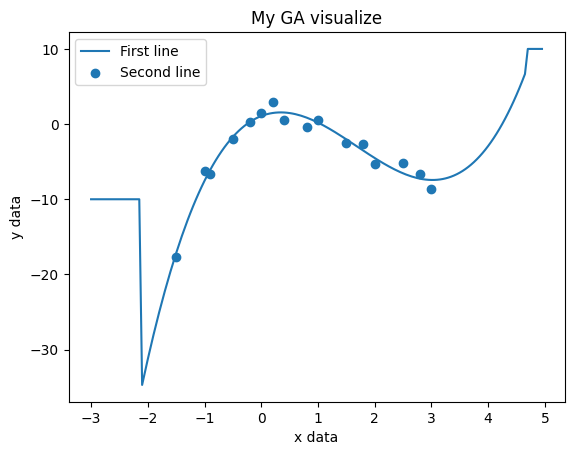

In [303]:
visualize(best_chromosome3,x_axis,x_data ,y_data,eval_int)

In [310]:
#جمعیت هر دوره افزایش یابد

class GA:
    def __init__(self, x_data, y_data, num_genes, mutation_rate, tournament_size):
        self.x_data = x_data
        self.y_data = y_data
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size

    def fitness(self, chromosome):
        # Convert chromosome to polynomial coefficients
        polynomial = np.poly1d(chromosome)


        y_predicted = polynomial(self.x_data)

        # Calculate mean squared error
        mse = MSE(y_predicted , self.y_data)

        return -mse  # Negative because we want to maximize fitness

    def select_parents(self, population):
        # Tournament selection
        selected_parents = random.sample(population, self.tournament_size)

        # Sort the selected parents based on fitness score in descending order
        sorted_parents = sorted(selected_parents, key=self.fitness, reverse=True)

        # Return the two best parents based on fitness score
        return sorted_parents[0], sorted_parents[1]


    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = random.randint(1, self.num_genes - 1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def mutate(self, chromosome):
        # Random mutation
        for i in range(self.num_genes):
            if random.random() < self.mutation_rate:
                chromosome[i] += np.random.normal(-0.5, 0.5)  # Adding small random noise
        return chromosome


    
    def ga(self, num_generations, population_size):
        # Initialize population
        population = [np.random.uniform(-5, 5, self.num_genes) for _ in range(population_size)]

        for generation in range(num_generations):
            new_population = []
            

            #Preserving the best individual
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

            for _ in range(population_size // 2 - 1):
                parent1, parent2 = self.select_parents(population)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                mutated_child1 = self.mutate(child1)
                mutated_child2 = self.mutate(child2)
                new_population.extend([mutated_child1, mutated_child2])
            
            
            gen_fit_list = list(map(self.fitness , new_population))
            gen_average = sum(gen_fit_list)/len(new_population)
            
            if generation%10 ==0:
                
                print(f"Generation{generation}: average fitness is {gen_average} with the number of {len(population)} individuals population , best fitness: {max(gen_fit_list)}")
        
            for _ in range(generation):
                new_population += [np.random.uniform(-5, 5, self.num_genes) for _ in range(5)]
            
            
            population = new_population

        best_individual = max(population, key=self.fitness)
        return best_individual
    
    
ga = GA(x_data, y_data, 4, 0.1, 5)
best_chromosome4 = ga.ga(num_generations=100, population_size=100)
print("Best chromosome:", best_chromosome4)


Generation0: average fitness is -363.61536035795217 with the number of 100 individuals population , best fitness: -9.325622936313254
Generation10: average fitness is -28.94006278879478 with the number of 144 individuals population , best fitness: -0.9305641263015705
Generation20: average fitness is -91.51808181987039 with the number of 194 individuals population , best fitness: -0.8655480814003645
Generation30: average fitness is -194.74973848797188 with the number of 244 individuals population , best fitness: -0.861404134446899
Generation40: average fitness is -222.569222573104 with the number of 294 individuals population , best fitness: -0.861404134446899
Generation50: average fitness is -256.66264341672195 with the number of 344 individuals population , best fitness: -0.861404134446899
Generation60: average fitness is -256.9059363604959 with the number of 394 individuals population , best fitness: -0.861404134446899
Generation70: average fitness is -274.34972534161176 with the numb

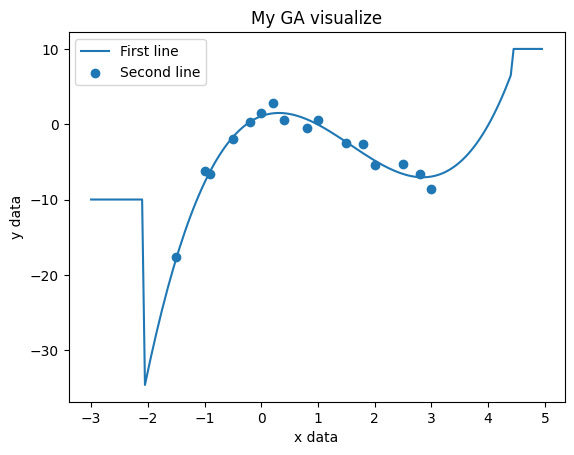

In [311]:
visualize(best_chromosome4,x_axis,x_data ,y_data,eval_int)

In [314]:
#بدون میوتیشن الگوریتم در مینیمم ناحیه ای گیر میکند

class GA:
    def __init__(self, x_data, y_data, num_genes, mutation_rate, tournament_size):
        self.x_data = x_data
        self.y_data = y_data
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size

    def fitness(self, chromosome):
        # Convert chromosome to polynomial coefficients
        polynomial = np.poly1d(chromosome)

        y_predicted = polynomial(self.x_data)

        # Calculate mean squared error
        mse = MSE(y_predicted , self.y_data)

        return -mse  # Negative because we want to maximize fitness

    def select_parents(self, population):
        # Tournament selection
        selected_parents = random.sample(population, self.tournament_size)

        # Sort the selected parents based on fitness score in descending order
        sorted_parents = sorted(selected_parents, key=self.fitness, reverse=True)

        # Return the two best parents based on fitness score
        return sorted_parents[0], sorted_parents[1]



    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def mutate(self, chromosome):
        # Random mutation
        for i in range(self.num_genes):
            if random.random() < self.mutation_rate:
                chromosome[i] += np.random.normal(-0.5, 0.5)  # Adding small random noise
        return chromosome

    def ga(self, num_generations, population_size):
        # Initialize population
        population = [np.random.uniform(-5, 5, self.num_genes) for _ in range(population_size)]

        for generation in range(num_generations):
            new_population = []
            

            #Preserving the best individual
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

            for _ in range(population_size // 2 - 1):
                parent1, parent2 = self.select_parents(population)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                #mutated_child1 = self.mutate(child1)
                #mutated_child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            
            
            gen_fit_list = list(map(self.fitness , new_population))
            gen_average = sum(gen_fit_list)/len(new_population)
            if generation%10 ==0:
                print(f"Generation{generation}: average fitness is {gen_average} , best fitness: {max(gen_fit_list)}")

            population = new_population

        best_individual = max(population, key=self.fitness)
        return best_individual




ga = GA(x_data, y_data, 4, 0.1, 5)
best_chromosome5 = ga.ga(num_generations=100, population_size=200)
print("Best chromosome:", best_chromosome5)


Generation0: average fitness is -348.16246059805985 , best fitness: -7.027668232557447
Generation10: average fitness is -4.3766849580840335 , best fitness: -1.4440771293864452
Generation20: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation30: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation40: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation50: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation60: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation70: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation80: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Generation90: average fitness is -1.4440771293864465 , best fitness: -1.4440771293864452
Best chromosome: [ 0.82605711 -4.21203701  2.93806212 -0.18644394]


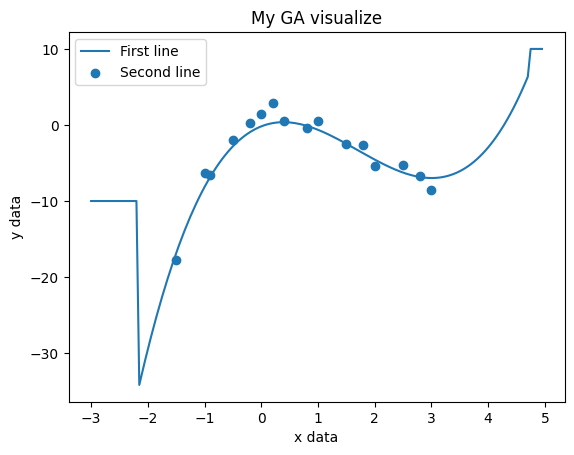

In [318]:
visualize(best_chromosome5,x_axis,x_data ,y_data,eval_int)

In [317]:
#بدون کراساور الگوریتم پیشرفتی نمیکند

class GA:
    def __init__(self, x_data, y_data, num_genes, mutation_rate, tournament_size):
        self.x_data = x_data
        self.y_data = y_data
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size

    def fitness(self, chromosome):
        # Convert chromosome to polynomial coefficients
        polynomial = np.poly1d(chromosome)

        y_predicted = polynomial(self.x_data)

        # Calculate mean squared error
        mse = MSE(y_predicted , self.y_data)

        return -mse  # Negative because we want to maximize fitness

    def select_parents(self, population):
        # Tournament selection
        selected_parents = random.sample(population, self.tournament_size)

        # Sort the selected parents based on fitness score in descending order
        sorted_parents = sorted(selected_parents, key=self.fitness, reverse=True)

        # Return the two best parents based on fitness score
        return sorted_parents[0], sorted_parents[1]



    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def mutate(self, chromosome):
        # Random mutation
        for i in range(self.num_genes):
            if random.random() < self.mutation_rate:
                chromosome[i] += np.random.normal(-0.5, 0.5)  # Adding small random noise
        return chromosome

    def ga(self, num_generations, population_size):
        # Initialize population
        population = [np.random.uniform(-5, 5, self.num_genes) for _ in range(population_size)]

        for generation in range(num_generations):
            new_population = []
            

            #Preserving the best individual
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

            for _ in range(population_size // 2 - 1):
                parent1, parent2 = self.select_parents(population)
                #child1 = self.crossover(parent1, parent2)
                #child2 = self.crossover(parent2, parent1)
                mutated_child1 = self.mutate(parent1)
                mutated_child2 = self.mutate(parent2)
                new_population.extend([mutated_child1, mutated_child2])
            
            
            gen_fit_list = list(map(self.fitness , new_population))
            gen_average = sum(gen_fit_list)/len(new_population)
            if generation%10 ==0:
                print(f"Generation{generation}: average fitness is {gen_average} , best fitness: {max(gen_fit_list)}")

            population = new_population

        best_individual = max(population, key=self.fitness)
        return best_individual




ga = GA(x_data, y_data, 4, 0.1, 5)
best_chromosome6 = ga.ga(num_generations=100, population_size=200)
print("Best chromosome:", best_chromosome6)


Generation0: average fitness is -332.6588624564779 , best fitness: -21.05340888133309
Generation10: average fitness is -4309.847597122722 , best fitness: -2956.9222112935686
Generation20: average fitness is -33288.709774437855 , best fitness: -26952.521288743323
Generation30: average fitness is -98568.46013927042 , best fitness: -78499.33500703865
Generation40: average fitness is -196205.7395784294 , best fitness: -156098.85478341987
Generation50: average fitness is -367775.2511551331 , best fitness: -346541.6094265682
Generation60: average fitness is -647834.6020653917 , best fitness: -637772.314192706
Generation70: average fitness is -942093.1056040851 , best fitness: -918007.0080133224
Generation80: average fitness is -1433308.2167533843 , best fitness: -1397689.2710198779
Generation90: average fitness is -1929920.1265184411 , best fitness: -1866065.609735612
Best chromosome: [ -95.48653155 -117.94384456 -110.34986298 -122.19383557]


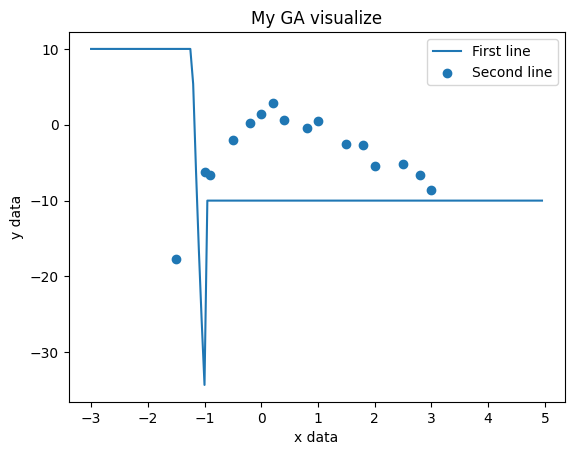

In [319]:
visualize(best_chromosome6,x_axis,x_data ,y_data,eval_int)

In [324]:
ga = GA(x_data, y_data, 8, 0.1, 5)
best_chromosome7 = ga.ga(num_generations=100, population_size=100)
print("Best chromosome:", best_chromosome7)

Generation0: average fitness is -960342.3869836279 , best fitness: -411.764794168165
Generation10: average fitness is -57780.88176750813 , best fitness: -71.9214994843488
Generation20: average fitness is -13302.954965386065 , best fitness: -45.81862431848535
Generation30: average fitness is -49991.119890985035 , best fitness: -41.939534583180304
Generation40: average fitness is -12394.736944699662 , best fitness: -39.607984069742926
Generation50: average fitness is -29925.495135403078 , best fitness: -37.61013638392509
Generation60: average fitness is -27024.40903384035 , best fitness: -36.13427979265951
Generation70: average fitness is -13885.316218131533 , best fitness: -35.354556464217836
Generation80: average fitness is -54526.9851523525 , best fitness: -35.26773127765789
Generation90: average fitness is -35380.89242318066 , best fitness: -35.007957014011296
Best chromosome: [-0.3607405   0.91433716  2.42442839 -4.45593712 -4.4408374  -1.36843283
  2.94391406  2.15264161]


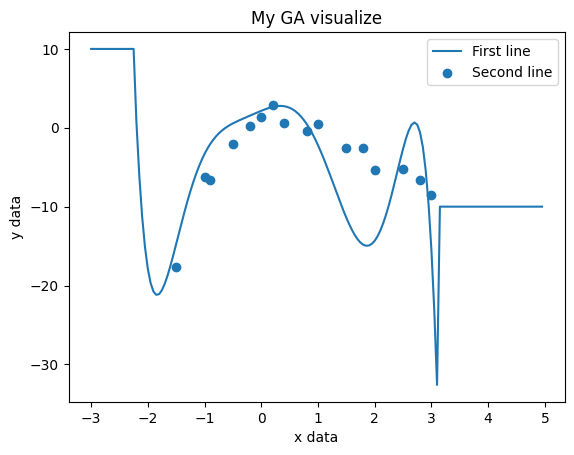

In [325]:
visualize(best_chromosome7,x_axis,x_data ,y_data,eval_int)

In [17]:
#binary coded encoding
import numpy as np
import random

class GA2:
    def __init__(self, x_data, y_data, num_genes, mutation_rate, tournament_size):
        self.x_data = x_data
        self.y_data = y_data
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size

    def fitness(self, chromosome):
        # Convert chromosome to polynomial coefficients
        polynomial = np.poly1d(chromosome)

        y_predicted = polynomial(self.x_data)

        # Calculate mean squared error
        mse = MSE(y_predicted , self.y_data)

        return -mse  # Negative because we want to maximize fitness

    def select_parents(self, population):
        # Tournament selection
        selected_parents = random.sample(population, self.tournament_size)

        # Sort the selected parents based on fitness score in descending order
        sorted_parents = sorted(selected_parents, key=self.fitness, reverse=True)

        # Return the two best parents based on fitness score
        return sorted_parents[0], sorted_parents[1]

    def crossover(self, parent1, parent2):
        # Single-point crossover
        crossover_point = random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        return child

    def mutate(self, chromosome):
        # Random mutation
        for i in range(self.num_genes):
            if random.random() < self.mutation_rate:
                chromosome[i] = 1 - chromosome[i]  # Flip the bit
        return chromosome

    def ga(self, num_generations, population_size):
        # Initialize population
        population = [np.random.randint(2, size=self.num_genes) for _ in range(population_size)]

        for generation in range(num_generations):
            new_population = []

            # Preserving the best individual
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

            for _ in range(population_size // 2 - 1):
                parent1, parent2 = self.select_parents(population)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                mutated_child1 = self.mutate(child1)
                mutated_child2 = self.mutate(child2)
                new_population.extend([mutated_child1, mutated_child2])

            gen_fit_list = list(map(self.fitness , new_population))
            gen_average = sum(gen_fit_list)/len(new_population)
            if generation % 10 == 0:
                print(f"Generation {generation} ------------> average fitness is {gen_average}, best fitness: {max(gen_fit_list)}")

            population = new_population

        best_individual = max(population, key=self.fitness)
        return best_individual


In [18]:
#converting every number to binary coded!!!

ga = GA2(x_data, y_data, 4, 0.1, 5)
best_chromosome8 = ga.ga(num_generations=100, population_size=100)

print("Best chromosome:", best_chromosome8)

Generation 0 ------------> average fitness is -88.02207119633832, best fitness: -37.4095613125
Generation 10 ------------> average fitness is -67.80266900694443, best fitness: -37.4095613125
Generation 20 ------------> average fitness is -62.930681129419185, best fitness: -37.4095613125
Generation 30 ------------> average fitness is -57.58740804861111, best fitness: -37.4095613125
Generation 40 ------------> average fitness is -57.27825654419193, best fitness: -37.4095613125
Generation 50 ------------> average fitness is -70.5794048421717, best fitness: -37.4095613125
Generation 60 ------------> average fitness is -53.14051229608587, best fitness: -37.4095613125
Generation 70 ------------> average fitness is -50.19540284974748, best fitness: -37.4095613125
Generation 80 ------------> average fitness is -64.21691238510101, best fitness: -37.4095613125
Generation 90 ------------> average fitness is -67.69111050378785, best fitness: -37.4095613125
Best chromosome: [0 0 0 0]
